# LyaCoLoRe outputs

This notebook is to open and plot the output of LyaCoLoRe.

To run LyaColore, follow steps in README file of https://github.com/igmhub/LyaCoLoRe/.

In [1]:
%pylab inline
import os
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, join

from lyacolore import utils

Populating the interactive namespace from numpy and matplotlib


## Open output files from LyaCoLoRe
Here, there is a choice between a Gaussian output file, or a 2LPT (density) one. Set the variable `file_type` to `gaussian` or `2lpt` to make your choice.

The HDUs contain the following information:

 - `METADATA` contains information about the QSOs.
 - `WAVELENGTH` contains the wavelength grid of the skewers in Angstroms.
 - `F_{X}` contains the skewers of transmitted flux fraction for an absorber `X`. Skewers are stored as an array, where each row corresponds to a separate skewer.
 - `DLA` contains information about the DLAs (if available).

In [2]:
file_type = 'gaussian'

In [3]:
assert file_type in ['gaussian','2lpt']

In [4]:
hdu = fits.open(os.environ['LYACOLORE_PATH']+
                '/example_data/gaussian/lyacolore_output_standard/0/0/transmission-16-0.fits.gz')
hdu.info()

Filename: //Users/James/Projects/LyaCoLoRe//example_data/gaussian/lyacolore_output_standard/0/0/transmission-16-0.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  METADATA      1 BinTableHDU     23   11R x 5C   [E, E, E, E, K]   
  2  WAVELENGTH    1 ImageHDU        11   (15150,)   float32   
  3  F_LYA         1 ImageHDU        12   (15150, 11)   float32   
  4  F_LYB         1 ImageHDU        13   (15150, 11)   float32   
  5  F_SI1260      1 ImageHDU        13   (15150, 11)   float32   
  6  F_SI1207      1 ImageHDU        13   (15150, 11)   float32   
  7  F_SI1193      1 ImageHDU        13   (15150, 11)   float32   
  8  F_SI1190      1 ImageHDU        13   (15150, 11)   float32   
  9  DLA           1 BinTableHDU     23   7R x 5C   [D, D, D, K, K]   


## Plot the Lya and Lyb absorption for a spectrum

In [5]:
# Select a skewer to plot
i_skw = 0

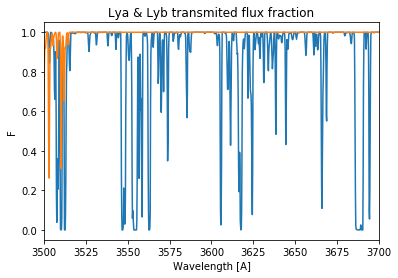

In [6]:
wave = hdu[2].data
plt.plot(wave,hdu['F_LYA'].data[i_skw], label='LYA')
plt.plot(wave,hdu['F_LYB'].data[i_skw], label='LYB')
plt.xlabel('Wavelength [A]')
plt.ylabel('F')
plt.xlim(3500,3700)
plt.ylim(-0.05,1.05)
plt.title('Lya & Lyb transmited flux fraction')
plt.show()

## Plot the metal absorption for the same spectrum

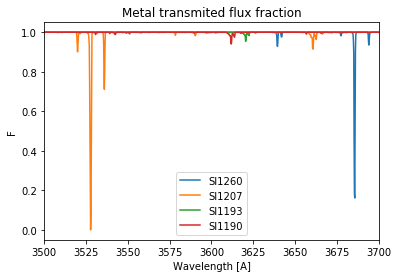

In [7]:
for h in hdu:
    if (h.name[:2]=='F_') & ('LY' not in h.name):
        plt.plot(wave,h.data[i_skw], label=h.name[2:])
plt.xlabel('Wavelength [A]')
plt.ylabel('F')
plt.xlim(3500,3700)
plt.ylim(-0.05,1.05)
plt.title('Metal transmited flux fraction')
plt.legend()
plt.show()

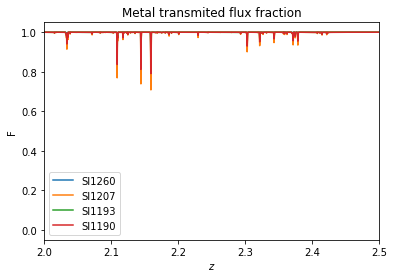

In [8]:
# Do the same, but shifting to redshift rather than wavelength.
# We expect to see the features sit on top of each other.
for h in hdu:
    if (h.name[:2]=='F_') & ('LY' not in h.name):
        abs_lr = float(h.header[h.name[2:]])
        plt.plot((wave/abs_lr)-1,h.data[i_skw], label=h.name[2:])
plt.xlabel('$z$')
plt.ylabel('F')
plt.xlim(2.0,2.5)
plt.ylim(-0.05,1.05)
plt.title('Metal transmited flux fraction')
plt.legend()
plt.show()

## Plot the Lya absorption for a spectrum along with its DLA locations

In [9]:
# Select a skewer with DLAs in it.
i_dla_skw = 0

In [10]:
# Extract the table of DLAs in that skewer.
mockid = list(set(hdu['DLA'].data['MOCKID']))[i_dla_skw]
i_skw = np.where(hdu['METADATA'].data['MOCKID']==mockid)[0][0]
dlas = hdu['DLA'].data[hdu['DLA'].data['MOCKID']==mockid]

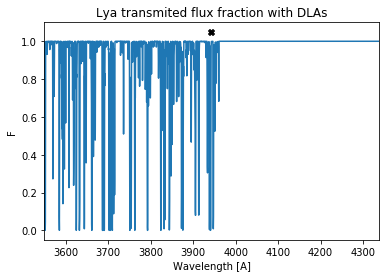

In [11]:
# Plot the Lya flux with crosses indicating DLA locations
wave = hdu[2].data
plt.plot(wave,hdu['F_LYA'].data[i_skw], label='LYA')
for dla in dlas:
    plt.scatter(utils.lya_rest*(1+dla['Z_DLA_RSD']),1.05,marker='X',c='k')
plt.xlabel('Wavelength [A]')
plt.ylabel('F')
plt.xlim(np.min(utils.lya_rest*(1+dla['Z_DLA_RSD']))*0.9,np.max(utils.lya_rest*(1+dla['Z_DLA_RSD']))*1.1)
plt.ylim(-0.05,1.1)
plt.title('Lya transmited flux fraction with DLAs')
plt.show()